In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
from statsmodels.formula.api import ols

ad_conversion = pd.read_csv('ad_conversion.csv')
# Create qdrt_n_impressions and qdrt_n_clicks
ad_conversion["qdrt_n_impressions"] = np.power(ad_conversion["n_impressions"], 0.25) 
ad_conversion["qdrt_n_clicks"] = np.power(ad_conversion["n_clicks"], 0.25)

In [3]:
mdl_click_vs_impression_orig = mdl_click_vs_impression =ols("n_clicks ~ n_impressions", data=ad_conversion).fit()

mdl_click_vs_impression_trans= mdl_click_vs_impression =  ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion).fit()

In [4]:
# Print a summary of mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.summary())


                            OLS Regression Results                            
Dep. Variable:               n_clicks   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     7683.
Date:                Mon, 20 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:27:46   Log-Likelihood:                -4126.7
No. Observations:                 936   AIC:                             8257.
Df Residuals:                     934   BIC:                             8267.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6829      0.789      2.133

In [5]:

# Print a summary of mdl_click_vs_impression_trans
print(mdl_click_vs_impression_trans.summary())

                            OLS Regression Results                            
Dep. Variable:          qdrt_n_clicks   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 1.590e+04
Date:                Mon, 20 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:27:46   Log-Likelihood:                 193.90
No. Observations:                 936   AIC:                            -383.8
Df Residuals:                     934   BIC:                            -374.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0717      0

In [6]:
# Print the coeff of determination for mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.rsquared)

# Print the coeff of determination for mdl_click_vs_impression_trans
print(mdl_click_vs_impression_trans.rsquared)

0.8916134973508041
0.9445272817143905


In [7]:
# Calculate mse_orig for mdl_click_vs_impression_orig
mse_orig = mdl_click_vs_impression_orig.mse_resid

# Calculate rse_orig for mdl_click_vs_impression_orig and print it
rse_orig = np.sqrt(mse_orig)
print("RSE of original model: ", rse_orig)

# Calculate mse_trans for mdl_click_vs_impression_trans
mse_trans = mdl_click_vs_impression_trans.mse_resid

# Calculate rse_trans for mdl_click_vs_impression_trans and print it
rse_trans = np.sqrt(mse_trans)
print("RSE of transformed model: ", rse_trans)

RSE of original model:  19.905838862478134
RSE of transformed model:  0.19690640896875722


In [8]:
taiwan_real_estate = pd.read_csv('taiwan_real_estate2.csv')

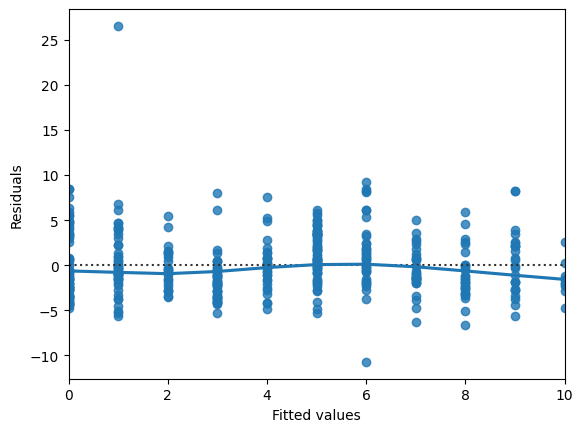

In [9]:
# Plot the residuals vs. fitted values
sns.residplot(x="n_convenience", y="price_twd_msq", data=taiwan_real_estate, lowess = True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

# Show the plot
plt.show()

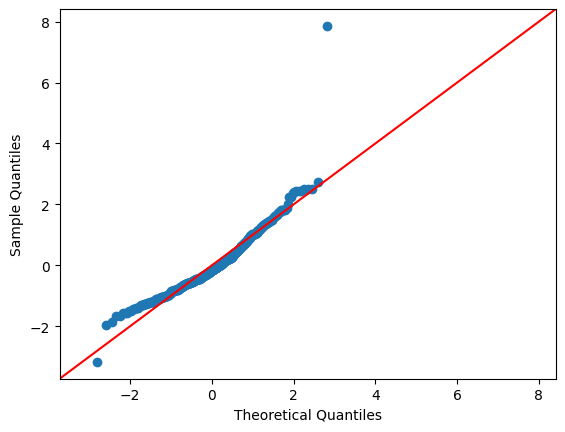

In [10]:
# Import qqplot
from statsmodels.api import qqplot
from statsmodels.formula.api import ols

# Create the model object
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()


# Create the Q-Q plot of the residuals
qqplot(data=mdl_price_vs_conv.resid, fit=True, line="45")

# Show the plot
plt.show()

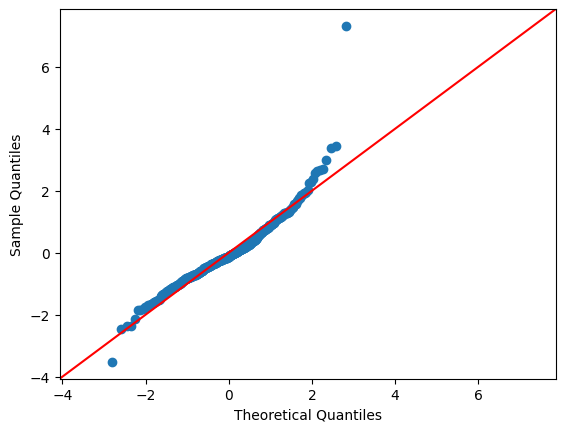

In [12]:
# Create the model object
mdl_price_vs_dist = ols("price_twd_msq ~ dist_to_mrt_m", data=taiwan_real_estate)

# Fit the model
mdl_price_vs_dist = mdl_price_vs_dist.fit()


# Create the Q-Q plot of the residuals
qqplot(data=mdl_price_vs_dist.resid, fit=True, line="45")

# Show the plot
plt.show()

In [14]:
mdl_price_vs_dist.get_influence().summary_frame()

,dfb_Intercept,dfb_dist_to_mrt_m,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.045802,0.028471,1.051794e-03,-0.729947,0.003932,-0.045865,-0.729532,-0.045839
1,-0.008087,0.004298,3.360963e-05,-0.141759,0.003334,-0.008199,-0.141590,-0.008189
2,0.027808,-0.011197,4.291555e-04,0.549988,0.002829,0.029297,0.549522,0.029272
3,0.065633,-0.026429,2.382744e-03,1.295938,0.002829,0.069033,1.297011,0.069090
4,0.000464,-0.000228,1.125574e-07,0.008446,0.003146,0.000474,0.008435,0.000474
...,...,...,...,...,...,...,...,...
409,0.003171,-0.009518,5.343029e-05,-0.080865,0.016079,-0.010337,-0.080768,-0.010325
410,0.029927,-0.018541,4.494837e-04,0.478213,0.003916,0.029983,0.477765,0.029955
411,-0.013174,0.006485,9.083522e-05,-0.239954,0.003145,-0.013479,-0.239680,-0.013463
412,0.045892,-0.028185,1.056835e-03,0.737356,0.003873,0.045975,0.736947,0.045949


In [16]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

# Run a linear regression of price_twd_msq vs. sqrt_dist_to_mrt_m
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

In [17]:
# Create summary_info
summary_info = mdl_price_vs_dist.get_influence().summary_frame()

# Add the hat_diag column to taiwan_real_estate, name it leverage
taiwan_real_estate["leverage"] = summary_info["hat_diag"]

# Sort taiwan_real_estate by leverage in descending order and print the head
display(taiwan_real_estate.sort_values("leverage", ascending = False).head())

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq,leverage,sqrt_dist_to_mrt_m
347,6488.021,1,15 to 30,3.388805,0.026665,80.548253
116,6396.283,1,30 to 45,3.691377,0.026135,79.976765
249,6306.153,1,15 to 30,4.538578,0.025617,79.411290
255,5512.038,1,30 to 45,5.264750,0.021142,74.243101
8,5512.038,1,30 to 45,5.688351,0.021142,74.243101


In [19]:
# Create summary_info
summary_info = mdl_price_vs_dist.get_influence().summary_frame()

# Add the hat_diag column to taiwan_real_estate, name it leverage
taiwan_real_estate["leverage"] = summary_info["hat_diag"]

# Add the cooks_d column to taiwan_real_estate, name it cooks_dist
taiwan_real_estate["cooks_dist"] = summary_info["cooks_d"]

# Sort taiwan_real_estate by cooks_dist in descending order and print the head.
display(taiwan_real_estate.sort_values("cooks_dist", ascending = False).head())

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq,leverage,sqrt_dist_to_mrt_m,cooks_dist
270,252.5822,1,0 to 15,35.552194,0.003849,15.892835,0.115549
148,3780.5900,0,15 to 30,13.645991,0.012147,61.486503,0.052440
228,3171.3290,0,0 to 15,14.099849,0.009332,56.314554,0.035384
220,186.5101,9,30 to 45,23.691377,0.004401,13.656870,0.025123
113,393.2606,6,0 to 15,2.299546,0.003095,19.830799,0.022813
